In the complex and interconnected world of modern business, optimizing the supply chain is paramount for achieving operational efficiency, reducing costs, and enhancing overall competitiveness. This project is dedicated to conducting a thorough supply chain analysis, leveraging the power and flexibility of Python programming to unravel insights that can streamline processes and drive strategic decision-making.

importing necessary libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#importin the supply chain dataset
df = pd.read_csv(r"C:\Users\onahv\OneDrive\Desktop\python training projects\Supplychain\supply_chain_data.csv")

df.head(5)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [36]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


using pie chart to display the sales in percentage

C:\Users\onahv\AppData\Local\Temp\ipykernel_11808\311418533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby("Product type").sum()


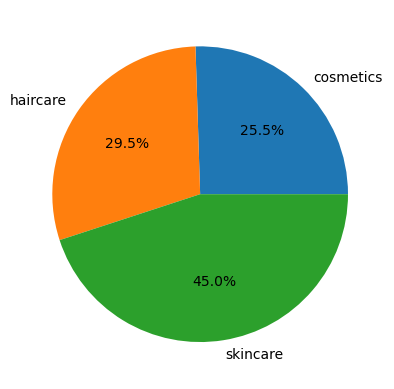

In [37]:
grouped_data = df.groupby("Product type").sum()
plt.pie(grouped_data["Number of products sold"], labels=grouped_data.index, autopct='%1.1f%%')

plt.show()
#45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics

location with their number of sales

In [38]:
location_sales = df.groupby(df["Location"])
sales_by_location =location_sales["Number of products sold"].sum()
print(sales_by_location)

Location
Bangalore     5420
Chennai       8768
Delhi         9715
Kolkata      12770
Mumbai        9426
Name: Number of products sold, dtype: int64


showing the amount of sales made at different locations using a bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

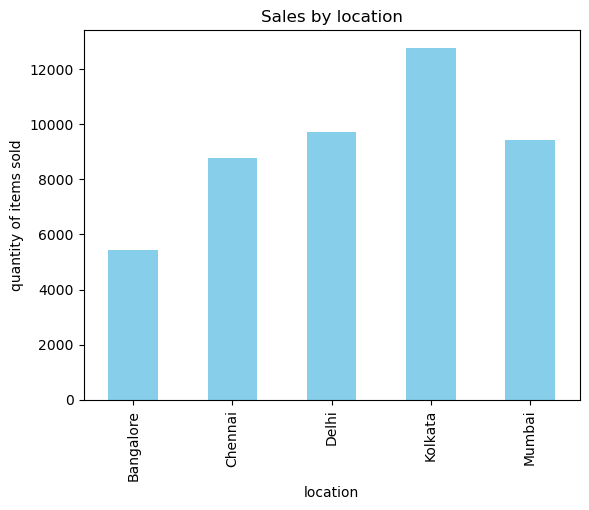

In [39]:
sales_by_location.plot(kind="bar", color = "skyblue")
plt.xlabel("location")
plt.ylabel("quantity of items sold")
plt.title("Sales by location")

plt.show

location with their number of sales using pie chart

C:\Users\onahv\AppData\Local\Temp\ipykernel_11808\2719465489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_location = df.groupby(df["Location"]).sum()


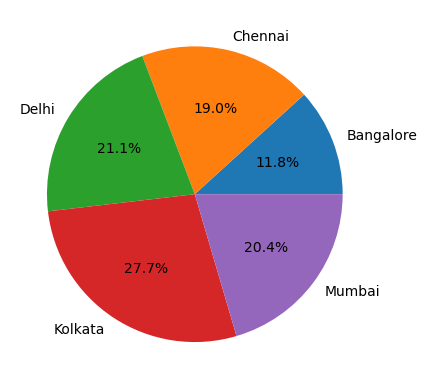

In [40]:
grouped_location = df.groupby(df["Location"]).sum()
plt.pie(grouped_location["Number of products sold"], labels=grouped_location.index, autopct='%1.1f%%')
plt.show()

#kolkkata has the highest number of products sold (27.7%)

Showing the total revenue generated from  different shipping carriers using pie chart

Shipping carriers
Carrier A    142629.994607
Carrier B    250094.646988
Carrier C    184880.177143
Name: Revenue generated, dtype: float64


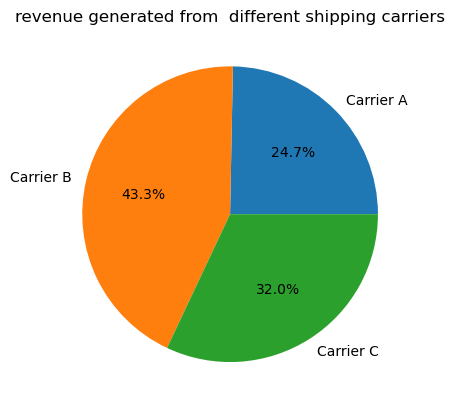

In [41]:
grouped_shipping_carriers = df.groupby("Shipping carriers")
Revenue_generated = grouped_shipping_carriers["Revenue generated"].sum()
print(Revenue_generated)
plt.pie(Revenue_generated,  labels=Revenue_generated.index, autopct='%1.1f%%')
plt.title ("revenue generated from  different shipping carriers")

plt.show()

#carrier B is seen to have generated more revenue (43.3%)

Showing the total revenue generated from  different shipping carriers using bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

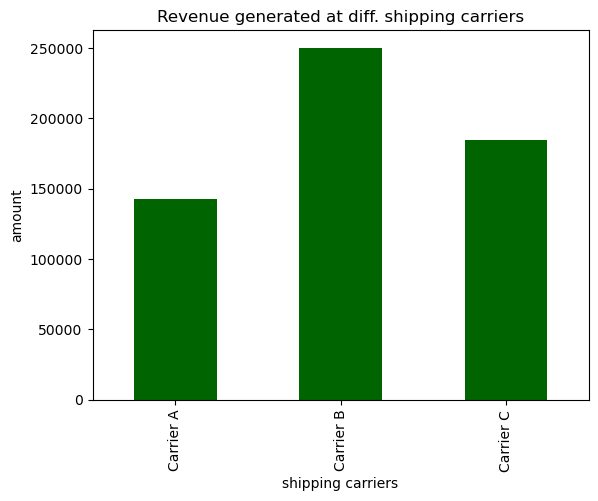

In [42]:
Revenue_generated.plot(kind= "bar", color = "darkgreen")
plt.ylabel("amount")
plt.xlabel("shipping carriers")
plt.title("Revenue generated at diff. shipping carriers")
plt.show

cost distribution by transportation mode

Transportation modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: Costs, dtype: float64


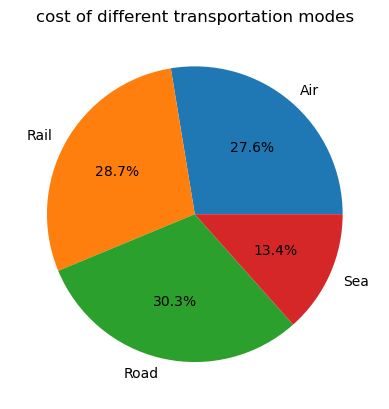

In [43]:
grouped_transportation_mode = df.groupby("Transportation modes")
transportation_modes = grouped_transportation_mode["Costs"].sum()
print(transportation_modes)
plt.pie(transportation_modes, labels=transportation_modes.index, autopct= "%1.1f%%")
plt.title("cost of different transportation modes")

plt.show()
#Sea modes of transportation cost lesser than other modes